In [1]:
import numpy as np
import time

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 

In [2]:
# setting class names
class_names  =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

(x_train,y_train),(x_test,y_test)=cifar10.load_data()



170500096/170498071 [==============================] - 3s 0us/step


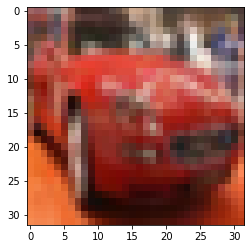

In [3]:
plt.imshow(x_train[5])


In [4]:
x_train=x_train/255.0
x_train.shape


(50000, 32, 32, 3)

In [5]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [7]:
y_test.shape,y_train.shape

((10000, 10), (50000, 10))

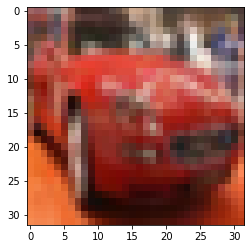

In [8]:
plt.imshow(x_train[5])


(a) No BatchNormalization


In [ ]:
def make_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.ZeroPadding2D(padding=(2,2), data_format=None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Dense(units=64,activation='relu'))  #acc = 64,64,
  # model.add(tf.keras.layers.Dense(units=128,activation='relu’))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))  #acc 64

  return model

In [ ]:
model = make_model() 
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=opt,  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

In [ ]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=0)
# model.fit()
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  100.51679587364197


In [ ]:
_,acc = model.evaluate(x_test,y_test, verbose=0)

In [ ]:
print(_,acc)

1.0904604196548462 0.6450999975204468


(b) Two Dense Layers. (Note: The last Dense layer should
have 10 nodes as there are 10 classes. For the Dense layer
before that, use 64 nodes.)

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_15 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 64)        1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 18496)             0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 18496)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                1183808   
_________________________________________________________________
dense_24 (Dense)             (None, 10)              

(b)  Dense Layers. (Note: The last Dense layer should have 10 nodes as there are 10 classes. For the Dense layer before that, use 64 nodes.Two)
bold textbold text






In [ ]:
def make_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.ZeroPadding2D(padding=(2,2), data_format=None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Dense(units=64,activation='relu'))  #acc = 64,64,
  # model.add(tf.keras.layers.Dense(units=128,activation='relu’))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))  #acc 64

  return model

In [ ]:
model = make_model() 
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=opt,  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

In [ ]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=0)
# model.fit()
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  122.1863203048706


In [ ]:
_,acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1849 - accuracy: 0.6184


In [ ]:
print(_,acc)

1.088453769683838 0.6223000288009644


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 34, 34, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 34, 34, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
_________________________________________________________________
dropout (Dropout)            (None, 18496)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

**(c) 2 blocks of Conv2D -> BatchNorm2D->MaxPooling2D**

In [ ]:
def make_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.ZeroPadding2D(padding=(2,2), data_format=None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Dense(units=64,activation='relu'))  #acc = 64,64,
  # model.add(tf.keras.layers.Dense(units=128,activation='relu’))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))  #acc 64

  return model

In [ ]:
model = make_model() 
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=opt,  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

In [ ]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=0)
# model.fit()
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  174.62647342681885


In [ ]:
_,acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0473 - accuracy: 0.7203


d) 3 blocks of Conv2D -> BatchNorm2D->MaxPooling2D
Add a table contrasting the performance of the given architecture with
all above variations. State your analysis. **bold text**

In [9]:
def make_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.ZeroPadding2D(padding=(2,2), data_format=None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
  model.add(tf.keras.layers.BatchNormalization())
    # axis=-1, momentum=0.99, epsilon=0.01, center=True, scale=True,beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros',  moving_variance_initializer='ones', beta_regularizer=None,
    # gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    # renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    # trainable=True, virtual_batch_size=None, adjustment=None, name=None))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid',data_format = None))
  model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Dense(units=64,activation='relu'))  #acc = 64,64,
  # model.add(tf.keras.layers.Dense(units=128,activation='relu’))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))  #acc 64

  return model

In [10]:
model = make_model() 
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=opt,  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

In [11]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=1)
# model.fit()
end_time = time.time()
print("Testing time: ", end_time-start_time)

Epoch 1/20
782/782 [==============================] - 40s 9ms/step - loss: 1.7111 - accuracy: 0.3891 - val_loss: 1.3132 - val_accuracy: 0.5292
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 1.1477 - accuracy: 0.5873 - val_loss: 1.0270 - val_accuracy: 0.6356
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 0.9459 - accuracy: 0.6616 - val_loss: 0.9382 - val_accuracy: 0.6701
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.8485 - accuracy: 0.6998 - val_loss: 0.8395 - val_accuracy: 0.7097
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7610 - accuracy: 0.7323 - val_loss: 0.8094 - val_accuracy: 0.7144
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.6964 - accuracy: 0.7552 - val_loss: 0.8719 - val_accuracy: 0.6925
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.6457 - accuracy: 0.7729 - val_loss: 0.8489 - val_accuracy: 0.7054
Epoch

In [12]:
_,acc = model.evaluate(x_test,y_test,batch_size=64,verbose=1)

157/157 [==============================] - 1s 4ms/step - loss: 0.7890 - accuracy: 0.7542


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 36, 36, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 36, 36, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 36, 36, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 18, 18, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0